In [96]:
import pyodbc
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import display
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

In [98]:
cnx = pyodbc.connect(
    server="azuresqlorange.database.windows.net",
    database="orange_azure",
    user='orange',
    tds_version='7.4',
    password="Supermotdepasse!42",
    port=1433,
    driver = [item for item in pyodbc.drivers()][-1]
)

In [99]:
tables = ['analysis_actors', \
          'analysis_directors', \
          'analysis_directors_genres', \
          'analysis_first_name',\
          'analysis_last_name', \
          'analysis_movies', \
          'analysis_movies_directors', \
          'analysis_movies_genres', \
          'analysis_roles', \
         ]

for table in tables :
    querry = f'SELECT * FROM {table}'
    df = pd.read_sql(querry, cnx)
    display(f'{table}')
    display(df.head(10))
    display(df.shape)
    display(df.describe())
    display(df.dtypes)

'analysis_actors'

,id,first_name,last_name,gender,film_count
0,933,Lewis,Abernathy,M,1
1,2547,Andrew,Adamson,M,1
2,2700,William,Addy,M,1
3,2898,Seth (I),Adkins,M,1
4,2925,Charles (I),Adler,M,1
5,3226,Casey,Affleck,M,1
6,4306,Shigekazu,Aida,M,1
7,4856,Julliet,Akinyi,M,1
8,6005,Henri,Alciatore,M,1
9,6990,Dean,Alexandrou,M,1


(1907, 5)

,id,film_count
count,1907.000000,1907.000000
mean,364113.619297,1.042999
std,225417.728660,0.277216
min,933.000000,1.000000
25%,178212.000000,1.000000
50%,343482.000000,1.000000
75%,513784.000000,1.000000
max,841405.000000,9.000000


id             int64
first_name    object
last_name     object
gender        object
film_count     int64
dtype: object

'analysis_directors'

,id,first_name,last_name
0,429,Andrew,Adamson
1,2931,Darren,Aronofsky
2,9247,Zach,Braff
3,11652,James (I),Cameron
4,14927,Ron,Clements
5,15092,Ethan,Coen
6,15093,Joel,Coen
7,15901,Francis Ford,Coppola
8,15906,Sofia,Coppola
9,16816,Cameron,Crowe


(34, 3)

,id
count,34.000000
mean,41864.235294
std,27122.982251
min,429.000000
25%,16133.500000
50%,38309.000000
75%,66621.750000
max,88802.000000


id             int64
first_name    object
last_name     object
dtype: object

'analysis_directors_genres'

,director_id,genre,prob
0,429,Adventure,0.750000
1,429,Music,0.250000
2,429,Fantasy,0.750000
3,429,Romance,0.500000
4,429,Family,0.750000
5,429,Comedy,0.750000
6,429,Short,0.250000
7,429,Animation,0.750000
8,2931,Action,0.428571
9,2931,Horror,0.142857


(285, 3)

,director_id,prob
count,285.000000,285.000000
mean,40692.003509,0.308122
std,25768.702762,0.264488
min,429.000000,0.034483
25%,15901.000000,0.111111
50%,37872.000000,0.200000
75%,65940.000000,0.500000
max,83617.000000,1.000000


director_id      int64
genre           object
prob           float64
dtype: object

'analysis_first_name'

,Id,Nom
0,1,Aloysius
1,2,University
2,3,Gramma
3,4,Electric
4,5,Fred
5,6,Betty
6,7,Cecil
7,8,Bif
8,9,Andrew
9,10,Jim


(20, 2)

,Id
count,20.00000
mean,10.50000
std,5.91608
min,1.00000
25%,5.75000
50%,10.50000
75%,15.25000
max,20.00000


Id      int64
Nom    object
dtype: object

'analysis_last_name'

,Id,Nom
0,1,Alfalfa
1,2,Alfred
2,3,Gerty
3,4,Android
4,5,Bumpkin
5,6,Rubble
6,7,Noshow
7,8,Buff
8,9,Airpump
9,10,Backus


(20, 2)

,Id
count,20.00000
mean,10.50000
std,5.91608
min,1.00000
25%,5.75000
50%,10.50000
75%,15.25000
max,20.00000


Id      int64
Nom    object
dtype: object

'analysis_movies'

,id,name,year,rank
0,10920,Aliens,1986,8.2
1,17173,Animal House,1978,7.5
2,18979,Apollo 13,1995,7.5
3,30959,Batman Begins,2005,NaN
4,46169,Braveheart,1995,8.3
5,109093,Fargo,1996,8.2
6,111813,"Few Good Men, A",1992,7.5
7,112290,Fight Club,1999,8.5
8,116907,Footloose,1984,5.8
9,124110,Garden State,2004,8.3


(36, 4)

,id,year,rank
count,36.000000,36.000000,34.000000
mean,197622.861111,1995.277778,7.791176
std,99065.086324,8.136728,0.841128
min,10920.000000,1972.000000,5.300000
25%,122309.250000,1991.750000,7.500000
50%,209251.500000,1998.500000,7.950000
75%,269332.750000,2001.000000,8.300000
max,350424.000000,2005.000000,9.000000


id        int64
name     object
year      int64
rank    float64
dtype: object

'analysis_movies_directors'

,director_id,movie_id
0,429,300229
1,2931,254943
2,9247,124110
3,11652,10920
4,11652,333856
5,14927,192017
6,15092,109093
7,15092,237431
8,15093,109093
9,15093,237431


(41, 2)

,director_id,movie_id
count,41.000000,41.000000
mean,42883.926829,199053.292683
std,27759.655071,95327.264420
min,429.000000,10920.000000
25%,15901.000000,124110.000000
50%,38746.000000,207992.000000
75%,68161.000000,267038.000000
max,88802.000000,350424.000000


director_id    int64
movie_id       int64
dtype: object

'analysis_movies_genres'

,movie_id,genre
0,10920,Action
1,10920,Horror
2,10920,Sci-Fi
3,10920,Thriller
4,17173,Comedy
5,18979,Drama
6,30959,Action
7,30959,Adventure
8,30959,Crime
9,30959,Fantasy


(103, 2)

,movie_id,genre
count,103,103
unique,36,16
top,192017,Drama
freq,6,17


movie_id    object
genre       object
dtype: object

'analysis_roles'

,actor_id,movie_id,role
0,933,333856,Lewis Bodine
1,2547,300229,Duloc Mascot
2,2700,306032,Tyrone
3,2898,333856,Slovakian three-year-old boy
4,2925,192017,Additional Voices
5,3226,238072,Virgil Malloy
6,4306,194874,Mr. Valentine
7,4856,194874,Hans
8,6005,167324,Maitre D'
9,6990,30959,Shadow Warrior


(1989, 3)

,actor_id,movie_id
count,1989.000000,1989.000000
mean,361336.510809,202199.562594
std,225644.376234,102418.935085
min,933.000000,10920.000000
25%,174382.000000,124110.000000
50%,342248.000000,207992.000000
75%,511760.000000,300229.000000
max,841405.000000,350424.000000


actor_id     int64
movie_id     int64
role        object
dtype: object

In [187]:
def films_by_genre(begin, end):
    """
    Display number of films by genres for each year in a specific range
    
    
    Args :
    
        begin (int) : year to start the range 
        
        end : year to end the range 
        
    Return :
        
        none 
    
    """


    querry = f""" SELECT COUNT(CAST(amg.genre AS CHAR)) as films_by_genre, CAST(amg.genre AS CHAR) as genre, am.year
                FROM analysis_movies_genres amg
                LEFT JOIN analysis_movies AS am
                    ON am.id = CAST(CAST(amg.movie_id AS CHAR) AS INT)
                WHERE am.year BETWEEN {begin} AND {end} 
               GROUP BY CAST(amg.genre AS CHAR), am.year
               ORDER BY am.year
            """

    df = pd.read_sql(querry, cnx)
    
    plt.figure(figsize=(12,8))
    sns.barplot(x= 'year', y='films_by_genre', hue='genre', data=df)
    plt.show()

    return df

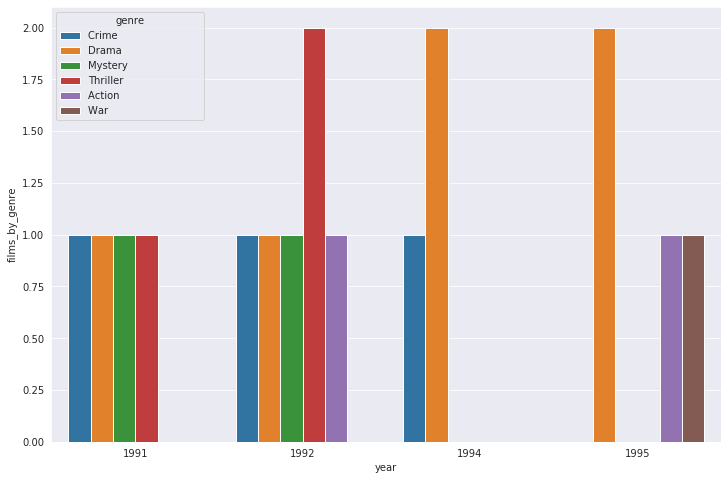

,films_by_genre,genre,year
0,1,Crime,1991
1,1,Drama,1991
2,1,Mystery,1991
3,1,Thriller,1991
4,1,Action,1992


,films_by_genre,year
count,14.000000,14.000000
mean,1.214286,1992.642857
std,0.425815,1.598420
min,1.000000,1991.000000
25%,1.000000,1991.250000
50%,1.000000,1992.000000
75%,1.000000,1994.000000
max,2.000000,1995.000000


films_by_genre     int64
genre             object
year               int64
dtype: object

In [188]:
df = films_by_genre(1990, 1995)
display(df.head())
display(df.describe())
display(df.dtypes)


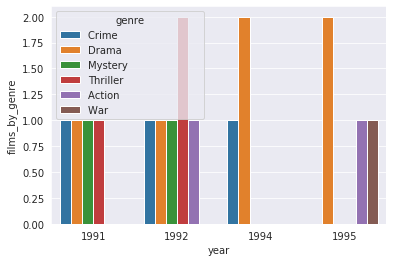

In [186]:
sns.barplot(x='year',
            y='films_by_genre',
            hue='genre',
            data=df)
